# ROC Curve : Non-linear Liklihood Ratio

## 1. Get points

$$m_{0} = -1; m{1} = 1$$

$$Var_{0} = 1; Var_{1} = 9$$

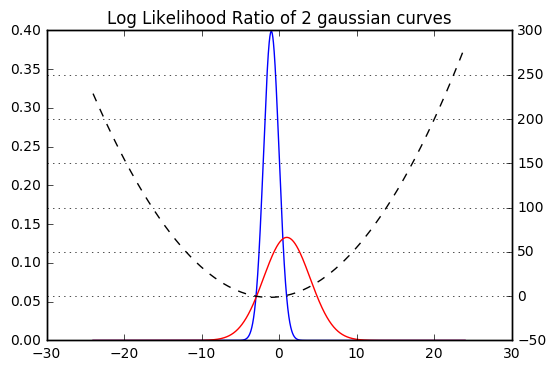

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

fig, ax1 = plt.subplots()

mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-24, 24, 5000)
datapoint1 = ax1.plot(x,mlab.normpdf(x, mu0, sigma0),'b-',label = "m0")

mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)
x = np.linspace(-24, 24, 5000)
datapoint2 = ax1.plot(x,mlab.normpdf(x, mu1, sigma1),'r-')

ax2 = ax1.twinx()

datapoint3 = ax2.plot(x,np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)),'k--')
plt.grid()
plt.title("Log Likelihood Ratio of 2 gaussian curves")

plt.show()

In [2]:
xy_threshold = datapoint3[0].get_xydata()
x = datapoint3[0].get_xdata()
y = datapoint3[0].get_ydata()

### Find the optimal x_value given different thresholds

In [3]:
from scipy.stats import norm
## Below def to get the corresponding x_value given threshold
def get_xvalue(yvalue):
    final_arr = []
    tol = 1e-03
    yindex = np.where(y==yvalue)
    while(len(yindex[0]) <= 1):
        yindex = np.where(np.isclose(y,yvalue,atol=tol))
        tol = tol+0.0001
    if(len(yindex[0])>2):
        final_arr = [yindex[0][0],yindex[0][len(yindex[0])-1]]
    elif(len(yindex[0])==2):
        final_arr = yindex
    return x[final_arr]

### illustration for Points from 2.3 to 10

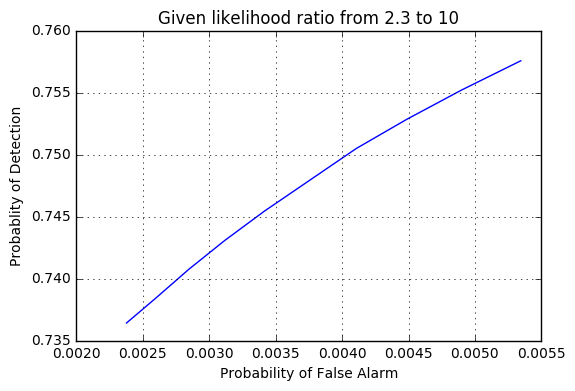

In [4]:
yspace = np.linspace(2.3,10,100)
roc_x1 = []
roc_y1 = []
for round in range(10):
    xvalue = get_xvalue(yspace[round])
    area_blue = norm.cdf((xvalue[1]-mu0)/variance0)-norm.cdf((xvalue[0]-mu0)/variance0)
    area_red = norm.cdf((xvalue[0]-mu1)/variance1)+1-norm.cdf((xvalue[1]-mu1)/variance1)
    roc_x1.append(1-area_blue)
    roc_y1.append(area_red)
plt.plot(roc_x1,roc_y1)
plt.title("Given likelihood ratio from 2.3 to 10")
plt.grid()
plt.xlabel("Probability of False Alarm")
plt.ylabel("Probablity of Detection")
plt.show()

In [5]:
yspace = np.linspace(-2,200,1000)
roc_x = []
roc_y = []
for round in range(201):
    xvalue = get_xvalue(yspace[round])
    area_blue = norm.cdf((xvalue[1]-mu0)/variance0)-norm.cdf((xvalue[0]-mu0)/variance0)
    area_red = norm.cdf((xvalue[0]-mu1)/variance1)+1-norm.cdf((xvalue[1]-mu1)/variance1)
    roc_x.append(1-area_blue)
    roc_y.append(area_red)

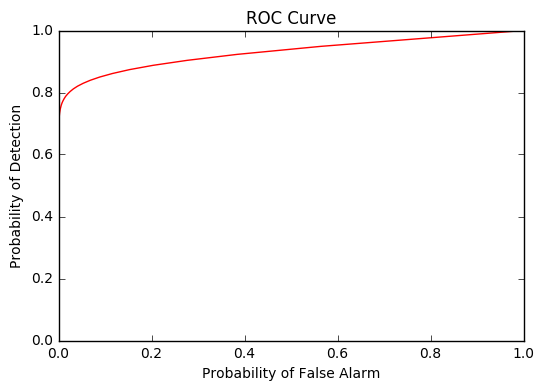

In [6]:
plt.plot(roc_x,roc_y,'r')
plt.title("ROC Curve")
plt.xlabel("Probability of False Alarm")
plt.ylim(0,1)
plt.ylabel("Probability of Detection")
plt.show()

## Corresponding datapoint for reference

In [7]:
import pandas as pd
df = pd.DataFrame({'points of probability of false alarm':roc_x,
                   'points of probability of detection':roc_y})
cols = ['Points of probability of Detection','p']
print(df.head())

   points of probability of detection  points of probability of false alarm
0                            0.999587                              0.996286
1                            0.999587                              0.996286
2                            0.999587                              0.996286
3                            0.999587                              0.996286
4                            0.948886                              0.564190
